In [1]:
#importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the inbuilt Dataset and assigning it to the df variable
df =sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Preprocessing

In [3]:
# Removing Unwanted Columns

In [4]:
# unwanted columns
# 1.alive--->similar to the target feature ['survived']
# 2.pclass-->['pclass'] and '[class]' both are similar
# 3.who----->['sex'] is given eithe male or female so we do not want this column
# 4.embarked---> ['embark_town'] is similat to this column
# 5.adult_male--> ['who'] and ['sex'] columns provide the same information
# 6.fare---> ['fare'] is not important as we are focused on ['survived'] feature
# 7.alone---->['alone'] is not requird as it is similar to the encoded of ['parch'] and ['sibsp']
# (Either travelling with parents or with siblings or alone-->we can conclude this with any 2 features so dropping alone ) 

In [5]:
#dropping the ['alive'] column as this column is similar to the target feature ['survived']
df = df.drop(columns=['alive','pclass','adult_male','embarked','who','fare', 'alone'], axis=1)
df.head()

,survived,sex,age,sibsp,parch,class,deck,embark_town
0,0,male,22.0,1,0,Third,NaN,Southampton
1,1,female,38.0,1,0,First,C,Cherbourg
2,1,female,26.0,0,0,Third,NaN,Southampton
3,1,female,35.0,1,0,First,C,Southampton
4,0,male,35.0,0,0,Third,NaN,Southampton


In [6]:
#checking for null values in the data
df.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
class            0
deck           688
embark_town      2
dtype: int64

In [7]:
print('Percentage of misssing values of Age: ',(177/891)*100)
print('Percentage of misssing values of deck: ',(688/891)*100)
print('Percentage of misssing values of embark_town: ',(2/891)*100)

Percentage of misssing values of Age:  19.865319865319865
Percentage of misssing values of deck:  77.21661054994388
Percentage of misssing values of embark_town:  0.22446689113355783


In [8]:
# We will drop ['deck'] column as it has more than 25% missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   class        891 non-null    category
 6   deck         203 non-null    category
 7   embark_town  889 non-null    object  
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 44.1+ KB


In [10]:
df = df.drop(columns=['deck'] , axis=1)
df.head()

,survived,sex,age,sibsp,parch,class,embark_town
0,0,male,22.0,1,0,Third,Southampton
1,1,female,38.0,1,0,First,Cherbourg
2,1,female,26.0,0,0,Third,Southampton
3,1,female,35.0,1,0,First,Southampton
4,0,male,35.0,0,0,Third,Southampton


In [11]:
#Checking for the other  Null values
df.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
class            0
embark_town      2
dtype: int64

In [12]:
#Here age is a Continuous value so we will go with filling the values with Mean/Median(After Checking for the Outliers,
# if outlier is present then we will go with Median if not Mean) 

<AxesSubplot:ylabel='age'>

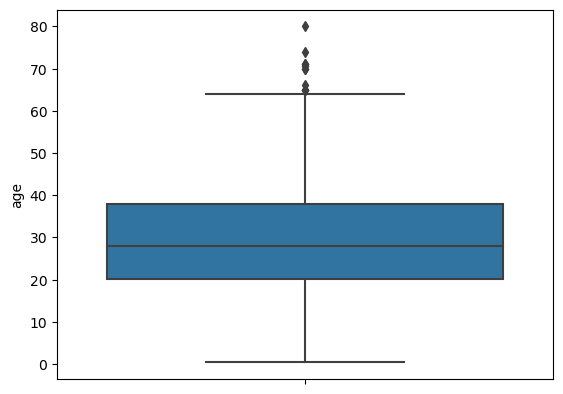

In [13]:
#Checking For Outlier of ['age'] column using boxplot
sns.boxplot(y='age' , data=df)

In [14]:
#Outlier are Present In the ['age'] column so we will fill it with median

In [15]:
df['age'] = df['age'].fillna(df['age'].median())

In [16]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
class          0
embark_town    2
dtype: int64

In [17]:
#['embark_town'] is a (Categorical Data) Object so we will fill it with mode 

In [18]:
df['embark_town'].mode

<bound method Series.mode of 0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object>

In [19]:
#Checking for the maximum repeated Category
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [20]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [21]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
class          0
embark_town    0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   class        891 non-null    category
 6   embark_town  891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [23]:
#Encoding of the Categorical Data here columns ['sex'] , ['class'] , ['embark_town'] are categorical data 
# so we will encode it first with label Encoder and with One Hot Encoding

In [24]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df = pd.get_dummies(df ,columns=['sex'])

In [25]:
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
df = pd.get_dummies(df ,columns=['class'])

In [26]:
df['embark_town'] = df['embark_town'].astype('category')
df['embark_town'] = df['embark_town'].cat.codes
df = pd.get_dummies(df ,columns=['embark_town'])

In [27]:
#Checking the DataSet
df.head()

,survived,age,sibsp,parch,sex_0,sex_1,class_0,class_1,class_2,embark_town_0,embark_town_1,embark_town_2
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   age            891 non-null    float64
 2   sibsp          891 non-null    int64  
 3   parch          891 non-null    int64  
 4   sex_0          891 non-null    uint8  
 5   sex_1          891 non-null    uint8  
 6   class_0        891 non-null    uint8  
 7   class_1        891 non-null    uint8  
 8   class_2        891 non-null    uint8  
 9   embark_town_0  891 non-null    uint8  
 10  embark_town_1  891 non-null    uint8  
 11  embark_town_2  891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 34.9 KB


In [29]:
#Dropping the Unwanted Encoded Columns to avoid Multicolinearity
df = df.drop(columns=['class_0', 'class_0', 'embark_town_0'], axis=1)
df.head()

,survived,age,sibsp,parch,sex_0,sex_1,class_1,class_2,embark_town_1,embark_town_2
0,0,22.0,1,0,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0,0
2,1,26.0,0,0,1,0,0,1,0,1
3,1,35.0,1,0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,1,0,1


In [30]:
#As the Target variable is  of categorical type we should check if the Dataset is Balanced or Imbalanced

In [31]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### To check for Imbalanced Dataset
#### -first check for df['column'].value_count()
#### - Second Check for Majority and Minority Category in the output
#### - Check if (Majority <= 2 * Minority) if yes it is a ****Balanced*** Dataset
                                     #### if it is not it is ***Imbalanced*** Dataset

In [32]:
342*2

684

In [33]:
684>=549 #as 2* Minority is greater than 

True

In [34]:
#The Data is Balanced Dataset

In [35]:
#Splitting the data into X and Y (Where x--- Independent features
#                                       y---- Target Feature)

In [36]:
x = df.iloc[:,1:]
y = df.iloc[:,0:1]

In [37]:
print(x.to_string())

       age  sibsp  parch  sex_0  sex_1  class_1  class_2  embark_town_1  embark_town_2
0    22.00      1      0      0      1        0        1              0              1
1    38.00      1      0      1      0        0        0              0              0
2    26.00      0      0      1      0        0        1              0              1
3    35.00      1      0      1      0        0        0              0              1
4    35.00      0      0      0      1        0        1              0              1
5    28.00      0      0      0      1        0        1              1              0
6    54.00      0      0      0      1        0        0              0              1
7     2.00      3      1      0      1        0        1              0              1
8    27.00      0      2      1      0        0        1              0              1
9    14.00      1      0      1      0        1        0              0              0
10    4.00      1      1      1      0     

In [38]:
print(y.to_string())

     survived
0           0
1           1
2           1
3           1
4           0
5           0
6           0
7           0
8           1
9           1
10          1
11          1
12          0
13          0
14          0
15          1
16          0
17          1
18          0
19          1
20          0
21          1
22          1
23          1
24          0
25          1
26          0
27          0
28          1
29          0
30          0
31          1
32          1
33          0
34          0
35          0
36          1
37          0
38          0
39          1
40          0
41          0
42          0
43          1
44          1
45          0
46          0
47          1
48          0
49          0
50          0
51          0
52          1
53          1
54          0
55          1
56          1
57          0
58          1
59          0
60          0
61          1
62          0
63          0
64          0
65          1
66          1
67          0
68          1
69          0
70    

In [39]:
#Splitting the Data into Training Data and Testing Data
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,train_size = 0.75 , random_state = 501)

## Building Machine Learning Models
### Logistic Regression

In [40]:
#Building the Model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train , y_train)

LogisticRegression()

In [41]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [42]:
logit.coef_

array([[-0.03377017, -0.25863917, -0.08701219,  1.22913268, -1.25184272,
        -0.66465295, -2.14145833, -0.23677869, -0.77687911]])

In [43]:
logit.intercept_

array([2.82615454])

In [44]:
#Importing the Metrices
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [45]:
confusion_matrix_train = confusion_matrix(y_train , y_pred_train)
confusion_matrix_test = confusion_matrix(y_test , y_pred_test)
print('confusion_matrix_train:  ' ,'\n' ,confusion_matrix_train )
print('confusion_matrix_test:  ' ,'\n'  , confusion_matrix_test )

confusion_matrix_train:   
 [[357  53]
 [ 81 177]]
confusion_matrix_test:   
 [[123  16]
 [ 23  61]]


In [46]:
classification_report_train = classification_report(y_train , y_pred_train)
calssification_report_test = classification_report(y_test , y_pred_test)
print('classification_report_train:  ' ,'\n' ,classification_report_train )
print('classification_report_test:  ' ,'\n' ,calssification_report_test )

classification_report_train:   
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       410
           1       0.77      0.69      0.73       258

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668

classification_report_test:   
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       139
           1       0.79      0.73      0.76        84

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



In [47]:
accuracy_train = accuracy_score(y_train , y_pred_train)
accuracy_test = accuracy_score(y_test , y_pred_test)
print('accuracy Score of train:  ' ,accuracy_train )
print('accuracy Score of test:  ' ,accuracy_test )

accuracy Score of train:   0.7994011976047904
accuracy Score of test:   0.8251121076233184


### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train , y_train)

RandomForestClassifier()

In [49]:
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [50]:
accuracy_train_rf = accuracy_score(y_train , y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test , y_pred_test_rf)
print('accuracy Score of train RandomForest:  ' ,accuracy_train_rf )
print('accuracy Score of test RandomForest:  ' ,accuracy_test_rf )

accuracy Score of train RandomForest:   0.9326347305389222
accuracy Score of test RandomForest:   0.8430493273542601


### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred_train_dt = dt_model.predict(x_train)
y_pred_test_dt = dt_model.predict(x_test)

In [53]:
accuracy_train_dt = accuracy_score(y_train , y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test , y_pred_test_dt)
print('accuracy Score of train Decision Tree:  ' ,accuracy_train_dt )
print('accuracy Score of test Decision Tree:  ' ,accuracy_test_dt )

accuracy Score of train Decision Tree:   0.9326347305389222
accuracy Score of test Decision Tree:   0.8026905829596412


# MLE(Maximum Likelyhood Estimation) 
# AUC/ROC

In [55]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.8055412812607058

In [56]:
from sklearn.metrics import roc_curve
fpr ,tpr, thresholds = roc_curve(y_test,y_pred_test)

In [57]:
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.11510791, 1.        ])

array([0.        , 0.72619048, 1.        ])

array([2, 1, 0], dtype=int64)

In [58]:
print(fpr[:10])
print(tpr[:10])
print(thresholds[:10])

[0.         0.11510791 1.        ]
[0.         0.72619048 1.        ]
[2 1 0]


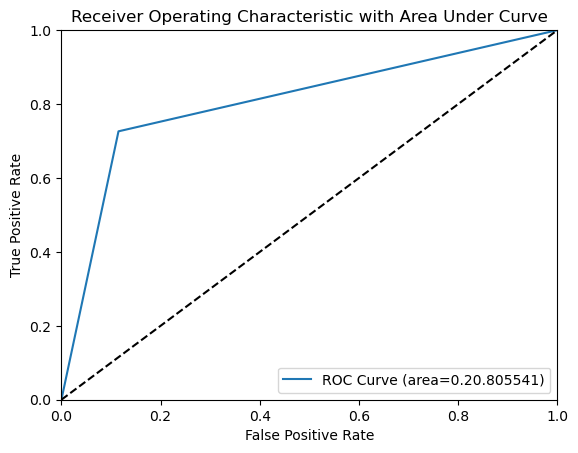

In [61]:
#Plotting ROC curve and AUC 
plt.figure()
plt.plot(fpr,tpr, label='ROC Curve (area=0.2%f)'% logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [68]:
# Cross Validation Score- K-Fold : improving yor accuracy
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(logit, X=x_train , y=y_train, cv=15)
accuracy_test = cross_val_score(logit, X=x_test , y=y_test, cv=15)
print(accuracy_train,'\n')
print(accuracy_test)

[0.82222222 0.84444444 0.77777778 0.73333333 0.82222222 0.88888889
 0.84444444 0.84444444 0.79545455 0.75       0.70454545 0.84090909
 0.77272727 0.70454545 0.79545455] 

[0.66666667 0.8        0.73333333 0.8        0.86666667 0.86666667
 0.86666667 0.93333333 0.86666667 0.93333333 0.73333333 0.66666667
 0.86666667 0.78571429 1.        ]


In [69]:
accuracy_train.mean()

0.7960942760942762

In [70]:
accuracy_test.mean()

0.8257142857142857

In [72]:
print("Training Accuracy: ",accuracy_train.max())
print("Testing Accuracy: ",accuracy_test.max())

Training Accuracy:  0.8888888888888888
Testing Accuracy:  1.0
